## Synthetic data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data import synthesize_data
import expectation_reflection as ER
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=20,regu=0.)
        y_pred = ER.predict(X_test,h0,w)
        y_pred_train = ER.predict(X_train,h0,w)

    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)   
            
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
    accuracy = accuracy_score(y_test,y_pred)                
                  
    return accuracy

In [4]:
list_methods=['logistic_regression','naive_bayes','random_forest','decision_tree','expectation_reflection']
def compare_inference(X,y,train_size):
    npred = 1000
    accuracy = np.zeros((len(list_methods),npred))
    precision = np.zeros((len(list_methods),npred))
    recall = np.zeros((len(list_methods),npred))
    accuracy_train = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        #X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)
        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = inference(X_train,y_train,X_test,y_test,method)
            
    return accuracy.mean(axis=1)

In [5]:
def plot_accuracy():
    plt.figure(figsize=(4,3))    
    plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
    plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
    plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
    #plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
    plt.plot(list_train_size,acc[:,4],'k-',marker='o',label='Expectation Reflection')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.legend()

### Binary variables

In [6]:
l = 500 ; n = 40 ; g = 10.

In [7]:
X,y = synthesize_data(l,n,g,data_type='binary')

In [8]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([247, 253]))

In [9]:
list_train_size = [0.8,0.6,0.4,0.2]
acc = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.90702 0.87929 0.81911 0.67122 0.94146]
0.6 [0.8926  0.86296 0.80792 0.6561  0.93069]
0.4 [0.86407 0.83419 0.78376 0.64604 0.90882]
0.2 [0.80636 0.78158 0.73194 0.62394 0.84198]


In [10]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.90702,0.87929,0.81911,0.67122,0.94146
1,0.6,0.89260,0.86296,0.80792,0.65610,0.93069
2,0.4,0.86407,0.83419,0.78376,0.64604,0.90882
3,0.2,0.80636,0.78158,0.73194,0.62394,0.84198


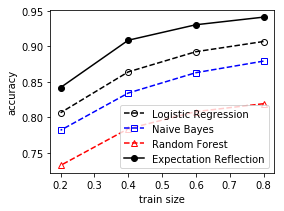

In [11]:
plot_accuracy()

### Continuous variables

In [12]:
l = 500 ; n = 40 ; g = 10.

In [13]:
X,y = synthesize_data(l,n,g,data_type='continuous')

In [14]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([229, 271]))

In [15]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.89654 0.8661  0.77562 0.64904 0.90076]
0.6 [0.88803 0.85211 0.76218 0.62338 0.89312]
0.4 [0.86838 0.82696 0.74346 0.61238 0.87369]
0.2 [0.81931 0.77372 0.70484 0.59305 0.81466]


In [16]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.89654,0.86610,0.77562,0.64904,0.90076
1,0.6,0.88803,0.85211,0.76218,0.62338,0.89312
2,0.4,0.86838,0.82696,0.74346,0.61238,0.87369
3,0.2,0.81931,0.77372,0.70484,0.59305,0.81466


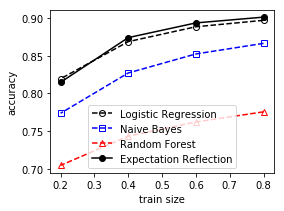

In [17]:
plot_accuracy()

### Categorical variables

In [18]:
l = 500 ; n = 10 ; g = 10.

In [19]:
X,y = synthesize_data(l,n,g,data_type='categorical')

In [20]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([416,  84]))

In [21]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.95386 0.9014  0.8305  0.83753 0.9512 ]
0.6 [0.94414 0.88719 0.83082 0.82651 0.94454]
0.4 [0.92659 0.82298 0.83114 0.81632 0.93082]
0.2 [0.89406 0.7003  0.83069 0.79468 0.88935]


In [22]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.95386,0.90140,0.83050,0.83753,0.95120
1,0.6,0.94414,0.88719,0.83082,0.82651,0.94454
2,0.4,0.92659,0.82298,0.83114,0.81632,0.93082
3,0.2,0.89406,0.70030,0.83069,0.79468,0.88935


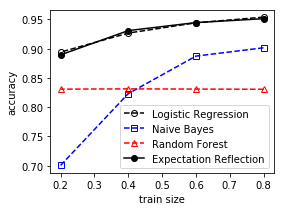

In [23]:
plot_accuracy()